### Full test of workflow to calculate features

In [7]:
import pandas as pd
import numpy as np
from Feature_calc_functions import *
import time

#### Load the dataset and do preprocessing

The loadAllSubjects function does the following
- Adds a column called 'subject', which contains the subject ID
- Interpolates across NaNs
- Removes segments of data at the start and end of each activity
- Drops any remaining NaNs
- Resets the index of the dataframe

In [2]:
protocol_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Protocol"
optional_datadir = "/Users/rmartinshort/Documents/Berkeley/GDSO/PAMAP2_data/PAMAP2_Dataset/Optional"

In [3]:
all_data_protocol = loadAllSubjects(protocol_datadir)

Subject 3: Duration of activity 0.000000 not long enough to redact data
Subject 4: Duration of activity 5.000000 not long enough to redact data
Subject 6: Duration of activity 24.000000 not long enough to redact data
Subject 7: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data


In [4]:
all_data_optional = loadAllSubjects(optional_datadir)

Subject 6: Duration of activity 0.000000 not long enough to redact data
Subject 8: Duration of activity 0.000000 not long enough to redact data
Subject 8: Duration of activity 0.000000 not long enough to redact data
Subject 9: Duration of activity 0.000000 not long enough to redact data


In [5]:
all_data = pd.concat([all_data_protocol,all_data_optional])

Write to file for ease of loading next time

In [8]:
all_data.to_csv("All_subject_data.csv",index=False)

#### Do final preprocessing

The select_data_to_process function does the following

- Removes columns we know will not be useful
- Removes activity 0 

In [6]:
all_data = select_data_to_process(all_data)

#### Calculate features (may take a long time)

In [8]:
st = time.time()
feature_df = calculate_features(all_data)
ed = time.time()


-------------------------------
Subject 1.0
[(0, 25186), (25187, 46666), (46667, 66383), (66384, 87956), (87957, 108897), (108898, 115017), (115018, 120497), (120498, 126267), (126268, 131686), (131687, 151939), (151940, 170204), (170205, 191779), (191780, 211044), (211045, 221956), (221957, 274475), (274476, 356121), (356122, 408210), (408211, 433325)]
Activity 1.000000
Length of slice in samples: 25187
Number of feature calculations to be done: 246
Activity 2.000000
Length of slice in samples: 21480
Number of feature calculations to be done: 209
Activity 3.000000
Length of slice in samples: 19717
Number of feature calculations to be done: 192
Activity 17.000000
Length of slice in samples: 21573
Number of feature calculations to be done: 210
Activity 16.000000
Length of slice in samples: 20941
Number of feature calculations to be done: 204
Activity 12.000000
Length of slice in samples: 6120
Number of feature calculations to be done: 56
Activity 13.000000
Length of slice in samples: 5

In [10]:
print(ed-st)

120.44726490974426


#### Only takes 120 seconds to calculate features for the database. Will take longer once more complex features are added 

### Now we can do some exploration of the feature timeseries 

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline 

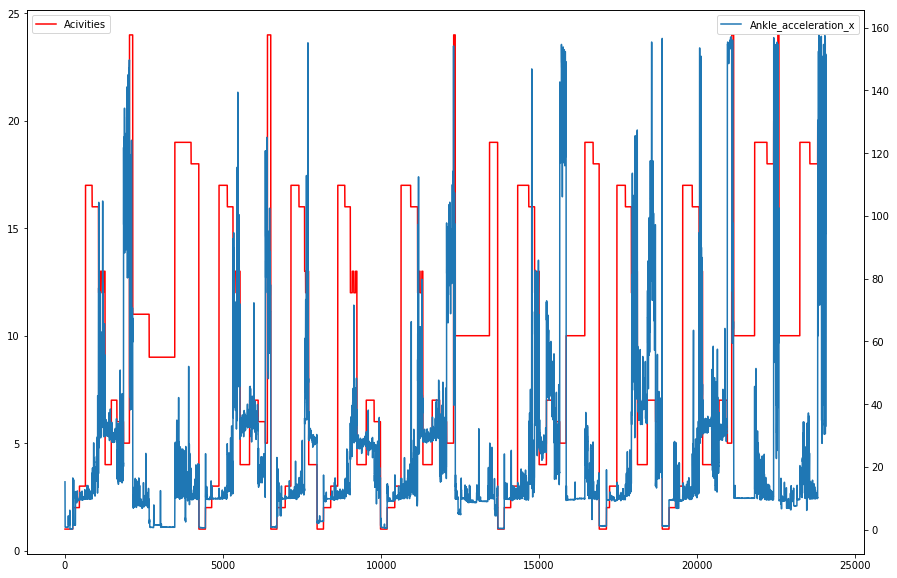

In [30]:
fig, ax1 = plt.subplots(figsize=(15,10))
X = np.array(feature_df.index)
Y1 = feature_df['activityID_mean'].values
Y2 = feature_df['ankle_acc16g_x_peak'].values
ax1.plot(X,Y1,'r-',label='Acivities')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(X,Y2,label='Ankle_acceleration_x')
ax2.legend(loc='upper right')

We can see that the activity pattern across subjects is quite similar. But the plot is too zoomed out for us to see much of how this feature changes with activity. For that, lets look in more detail at one of the subjects

In [22]:
list(feature_df.columns)

['timestamp_mean',
 'activityID_mean',
 'heart_rate_mean',
 'hand_temp_mean',
 'hand_acc16g_x_mean',
 'hand_acc16g_y_mean',
 'hand_acc16g_z_mean',
 'hand_gyro_x_mean',
 'hand_gyro_y_mean',
 'hand_gyro_z_mean',
 'hand_mag_x_mean',
 'hand_mag_y_mean',
 'hand_mag_z_mean',
 'chest_temp_mean',
 'chest_acc16g_x_mean',
 'chest_acc16g_y_mean',
 'chest_acc16g_z_mean',
 'chest_gyro_x_mean',
 'chest_gyro_y_mean',
 'chest_gyro_z_mean',
 'chest_mag_x_mean',
 'chest_mag_y_mean',
 'chest_mag_z_mean',
 'ankle_temp_mean',
 'ankle_acc16g_x_mean',
 'ankle_acc16g_y_mean',
 'ankle_acc16g_z_mean',
 'ankle_gyro_x_mean',
 'ankle_gyro_y_mean',
 'ankle_gyro_z_mean',
 'ankle_mag_x_mean',
 'ankle_mag_y_mean',
 'ankle_mag_z_mean',
 'subject_mean',
 'heart_rate_median',
 'hand_temp_median',
 'hand_acc16g_x_median',
 'hand_acc16g_y_median',
 'hand_acc16g_z_median',
 'hand_gyro_x_median',
 'hand_gyro_y_median',
 'hand_gyro_z_median',
 'hand_mag_x_median',
 'hand_mag_y_median',
 'hand_mag_z_median',
 'chest_temp_media

In [32]:
subject_1 = feature_df[feature_df['subject_mean']==1]

In [33]:
subject_1.head()

,timestamp_mean,activityID_mean,heart_rate_mean,hand_temp_mean,hand_acc16g_x_mean,hand_acc16g_y_mean,hand_acc16g_z_mean,hand_gyro_x_mean,hand_gyro_y_mean,hand_gyro_z_mean,...,ankle_temp_peak,ankle_acc16g_x_peak,ankle_acc16g_y_peak,ankle_acc16g_z_peak,ankle_gyro_x_peak,ankle_gyro_y_peak,ankle_gyro_z_peak,ankle_mag_x_peak,ankle_mag_y_peak,ankle_mag_z_peak
0,178.665,1.0,89.341797,31.06250,7.036548,0.914268,6.581603,0.070806,0.048449,-0.028595,...,31.25,4.098580,13.17360,4.82539,1.800790,0.693616,1.896490,22.4114,21.7617,11.62580
1,179.665,1.0,89.173828,31.06250,6.983914,1.286504,6.659315,-0.030556,0.004483,-0.039831,...,31.25,0.776836,13.17360,3.01728,1.746210,0.268816,0.174460,16.3434,19.8749,11.26420
2,180.665,1.0,88.601562,31.06250,6.968439,1.275079,6.685582,-0.025670,0.010829,-0.002390,...,31.25,0.776836,9.99581,1.28681,0.256304,0.078089,0.079559,16.3434,19.3602,10.00520
3,181.665,1.0,88.076172,31.06250,6.979813,1.242129,6.682105,-0.001395,0.009777,-0.006074,...,31.25,0.811665,9.99581,1.05373,0.080794,0.078089,0.057852,16.3434,19.3602,9.63081
4,182.665,1.0,87.626953,31.06958,6.977822,1.243811,6.686054,0.001094,0.009626,-0.008668,...,31.25,0.811665,9.99731,1.05373,0.083379,0.078089,0.057963,16.5630,19.3635,9.63081


In [34]:
subject_1.reset_index(inplace=True,drop=True)

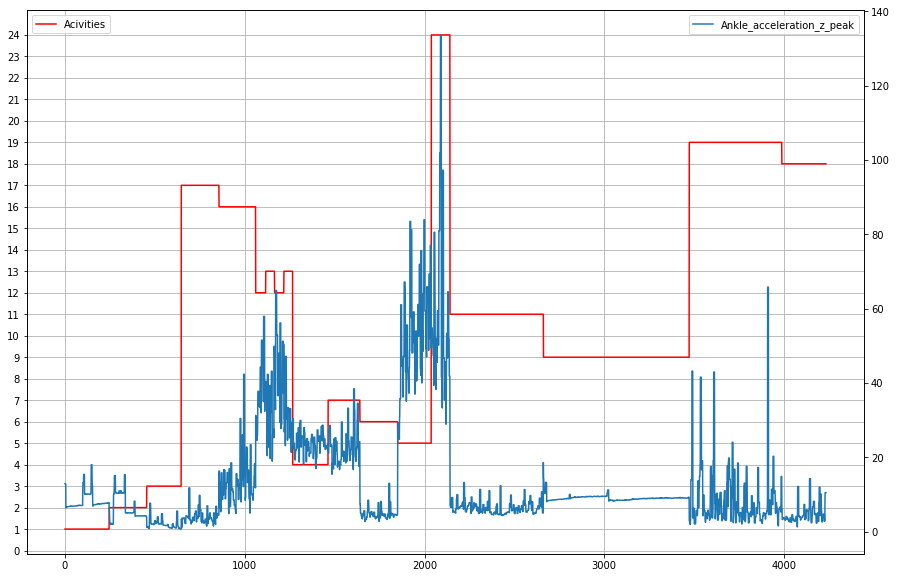

In [56]:
fig, ax1 = plt.subplots(figsize=(15,10))
X = np.array(subject_1.index)
Y1 = subject_1['activityID_mean'].values
Y2 = subject_1['ankle_acc16g_z_peak'].values
ax1.plot(X,Y1,'r-',label='Acivities')
ax1.yaxis.set_ticks(np.arange(0, 25, 1))
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(X,Y2,label='Ankle_acceleration_z_peak')
ax2.legend(loc='upper right')
ax1.grid()

We can definitely see some variation amongst activities, athough the situation is complicated! Some activities have much more variation than others, which suggests that frequency features might be useful here